# Applying labs to our dataset
## Lab 1

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [4]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

In [5]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

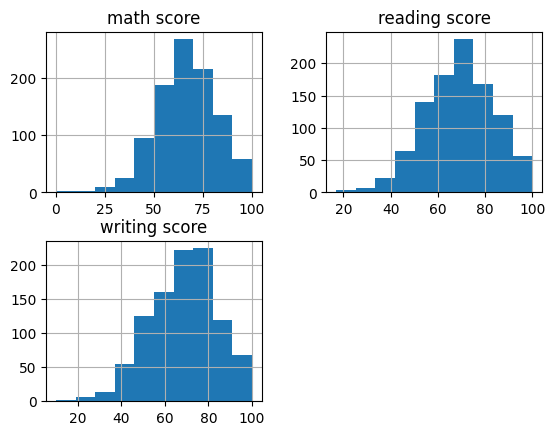

In [6]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot:xlabel='math score', ylabel='reading score'>

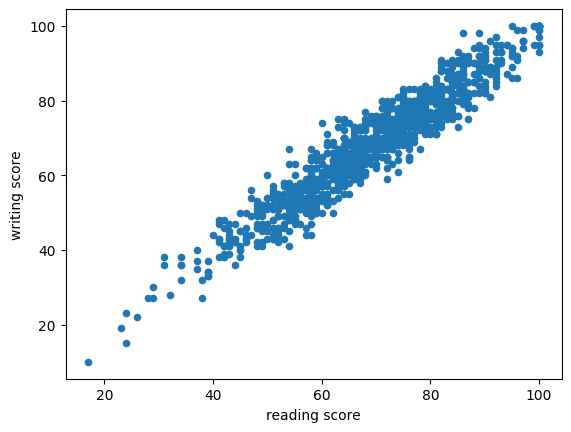

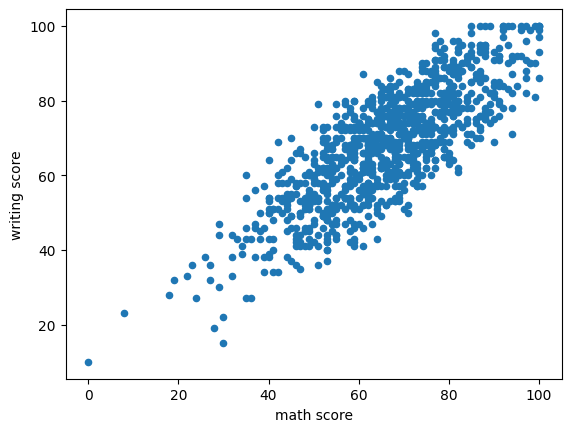

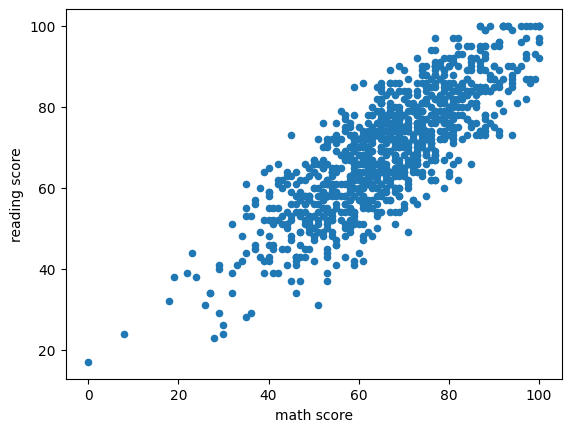

In [7]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Getting started with sci-kit learn :). The first part of this lab is not applicable to our dataset. However, in machine-learning/p2.ipynb, I went through it all with the MNIST dataset. 

### Pre-processing of the data 
First, turn all the categorical data into numerical data. Then normalize it and sort it into train and test data. 

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Turning categorical data into numerical data. We need ordinal encoding for all categorical values with a natural ordering and one-hot encoding for all data without any natural ordering.  
1. **Ordinal encoding**: Just replace the category by an integer.  
2. **One-hot encoding**: To avoid creating an order between data values that don't have a natural order, add another binary column for each unique value in the column. 

In [23]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [43]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [52]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


Now split the data into X (input) and y (target/outcome). In this case, I'm using the math score as y. 

In [71]:
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()  # Always good to check :) 

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [72]:
y.head()  # Also check y.

,math score
0,72
1,69
2,90
3,47
4,76


After having X and y, we can scale the data and then split the data into a training and a test set. 

In [73]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # The skaler for the data.
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [74]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

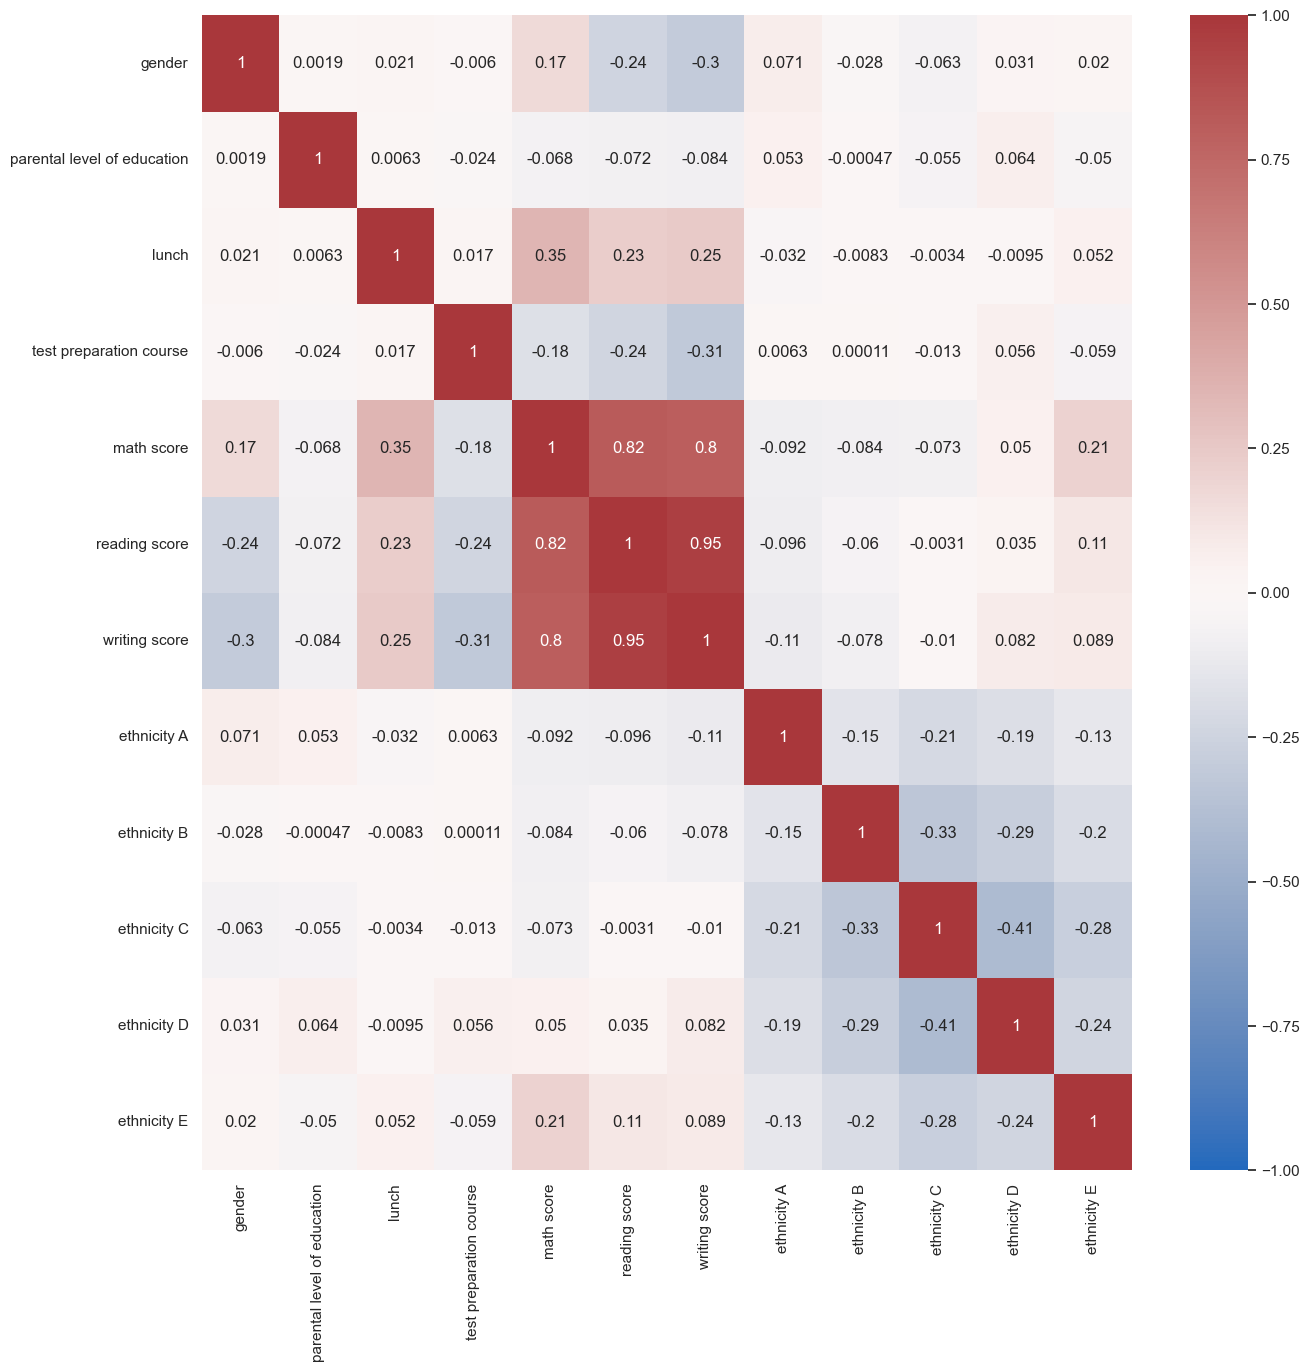

In [94]:
import seaborn as sns 

corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [105]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [108]:
corr_reading = corr_matrix.iloc[5].map(lambda x: abs(x))
corr_reading.sort_values(ascending=False)

reading score                  1.000000
writing score                  0.954598
math score                     0.817580
gender                         0.244313
test preparation course        0.241780
lunch                          0.229560
ethnicity E                    0.106712
ethnicity A                    0.096274
parental level of education    0.072444
ethnicity B                    0.060283
ethnicity D                    0.035177
ethnicity C                    0.003074
Name: reading score, dtype: float64

In [109]:
corr_gender = corr_matrix.iloc[0].map(lambda x: abs(x))  # Correlation for gender. 
corr_gender.sort_values(ascending=False)

gender                         1.000000
writing score                  0.301225
reading score                  0.244313
math score                     0.167982
ethnicity A                    0.071001
ethnicity C                    0.063368
ethnicity D                    0.030566
ethnicity B                    0.028466
lunch                          0.021372
ethnicity E                    0.020302
test preparation course        0.006028
parental level of education    0.001913
Name: gender, dtype: float64

In [118]:
corr_ethnicity_a = corr_matrix.iloc[7].map(lambda x: abs(x))  # Correlation for lunch.
corr_ethnicity_a.sort_values(ascending=False)

ethnicity A                    1.000000
ethnicity C                    0.213923
ethnicity D                    0.186234
ethnicity B                    0.151381
ethnicity E                    0.126110
writing score                  0.110714
reading score                  0.096274
math score                     0.091977
gender                         0.071001
parental level of education    0.053288
lunch                          0.032329
test preparation course        0.006315
Name: ethnicity A, dtype: float64

Split into three datasets containing a different amount of top-correlating features (1, 2, 3) for each class (in total: 3, 6, 9 features). The three classes I've chosen for practice here are `math score`, `gender` and `ethnicity A`. This doesn't necessarily make sense in the real world.

In [123]:
# Top correlating for
## Math score:  writing score,  math score,     gender
## Gender:      writing score,  reading score,  math score
## Ethnicity A: ethnicity C,    ethnicity D,    ethnicity B

data_two_features = df[['writing score', 'ethnicity C']]
data_five_features = df[
    ['writing score', 'math score', 'reading score', 'ethnicity C', 'ethnicity D']
]
data_seven_features = df[[
    'writing score', 
    'math score', 
    'reading score', 
    'ethnicity C', 
    'ethnicity D', 
    'gender', 
    'ethnicity B'
]]